# Employee Turnover Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("1688640705_hr_comma_sep.csv")
data.columns.str.strip()
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Data Observation**:
1. Most of the columns have continuous values except 'left', 'department' and 'salary' which have categorical values.
2. However, column 'left' already has numerical value which we would like to continue with as it's going to be the target.
3. Columns 'department' and 'salary' are of object types. So, we will apply encoding to these columns.
4. There are **no missing values** in this data set.


**2. Understand what factors contributed most to employee turnover by EDA**

**2.1 Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data**

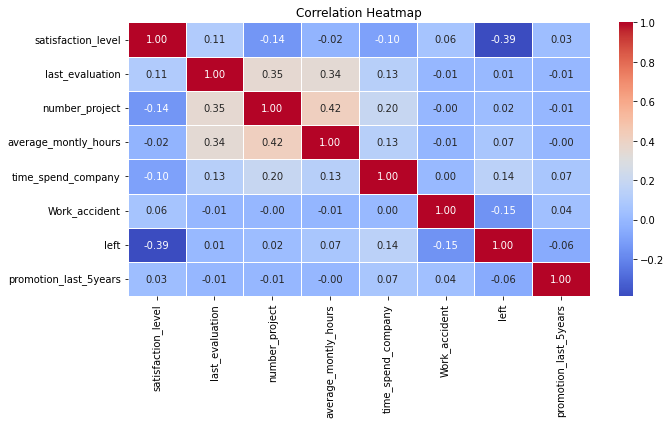

In [4]:
# Select only numerical columns
num_df = data.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**Observation from above correlation matrix**

 - satisfaction_level & left (Negative correleation) : 	Lower satisfaction → More likely to leave

 - time_spend_company & left (Positive correlation) ; 	Longer time → More More likely to leave

 - Work_accident & left (Negative correleation) : 	Lower Work_accident → More likely to leave

All other columns seem to have ~0 correlation with 'left' column.

**2.2 Draw the distribution plot of**

■	Employee Satisfaction (use column satisfaction_level)

■	Employee Evaluation (use column last_evaluation)

■	Employee Average Monthly Hours (use column average_montly_hours)


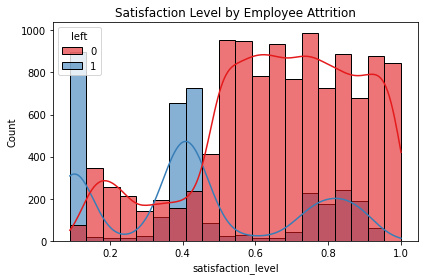

In [5]:
# Satisfaction Level vs Left
plt.subplot(1, 1, 1)
sns.histplot(data, x='satisfaction_level', hue='left', kde=True, bins=20, palette='Set1', alpha=0.6)
plt.title("Satisfaction Level by Employee Attrition")
plt.tight_layout()
plt.show()

**Observation from above graph**  (Left = 1 -> attrition)

- employees with satisfaction level between 0.5-1.0, mostly stayed. Some with high satisfaction level (between 0.8 - 0.9) have left indicating that not all satisfied employees tend to stay. This could be due to various reasons, like lack of rewards, external opportunities etc.
- employees with low satisfaction level (<0.5) prefered to leave. So, Dissatisfied employees are at high risk of attrition.

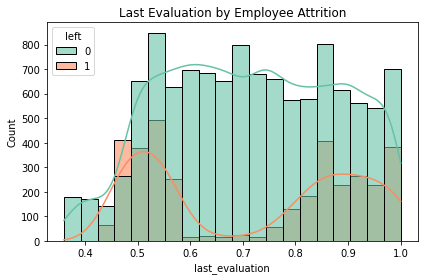

In [6]:
# Last Evaluation vs Left
plt.subplot(1, 1, 1)
sns.histplot(data, x='last_evaluation', hue='left', kde=True, bins=20, palette='Set2', alpha=0.6)
plt.title("Last Evaluation by Employee Attrition")
plt.tight_layout()
plt.show()

**Observation from above graph** (Left = 1 -> attrition)

- Employees who left tend to cluster around high evaluation scores (>0.8), suggesting some high-performing employees are leaving, possibly due to overwork.
- Certain number of employees with score <=5 have also left.

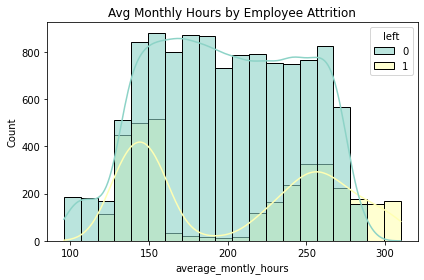

In [7]:
# Average Monthly Hours vs Left
plt.subplot(1, 1, 1)
sns.histplot(data, x='average_montly_hours', hue='left', kde=True, bins=20, palette='Set3', alpha=0.6)
plt.title("Avg Monthly Hours by Employee Attrition")

plt.tight_layout()
plt.show()

**Observation from above graph** (Left = 1 -> attrition)

Those who left are common in two ranges:
- Very high work hours (>250)
- Some also at low work hours (~100–150)

Implies **burnout** or **disengagement** could both lead to attrition.

**2.3 Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization**
(use column number_project and hue column left)  and give your inferences from the plot.

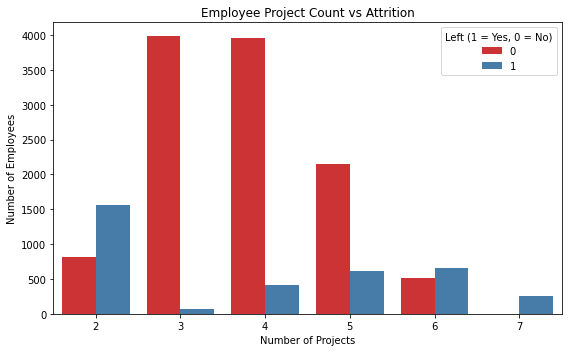

In [8]:
# Create a bar plot of number of projects with hue based on attrition (left)
plt.figure(figsize=(8, 5))
sns.countplot(data, x='number_project', hue='left', palette='Set1')

# Chart labels and title
plt.title('Employee Project Count vs Attrition')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left (1 = Yes, 0 = No)')

# Display the plot
plt.tight_layout()
plt.show()

Clear **blue** spikes for:

**2 projects**: May indicate boredom or lack of engagement.

**6–7 projects**: Suggests overload or burnout.

Employees at both extremes are more likely to leave.

**3.	Perform clustering of Employees who left based on their satisfaction and evaluation.**

3.1.	Choose columns satisfaction_level, last_evaluation and left.

3.2.	Do KMeans clustering of employees who left the company into 3 clusters.

3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Filter for employees who left
left_df = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]

In [10]:
# Step 2:  Find the best value for random_state using silhouette_score
best_seed = None
best_score = -1
no_of_clusters = 3
init_size = 1

# Try multiple random states
for seed in range(0, 50):
    kmeans = KMeans(n_clusters=no_of_clusters, n_init=init_size, random_state=seed)
    labels = kmeans.fit_predict(left_df)
    score = silhouette_score(left_df, labels)
    
    if score > best_score:
        best_score = score
        best_seed = seed

print(f"Best random_state: {best_seed} with silhouette score: {best_score:.4f}")

Best random_state: 0 with silhouette score: 0.7961


In [11]:
# Step 3: Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=no_of_clusters, n_init=init_size, random_state=best_seed)
left_df['cluster'] = kmeans.fit_predict(left_df)
left_df

,satisfaction_level,last_evaluation,cluster
0,0.38,0.53,0
1,0.80,0.86,1
2,0.11,0.88,2
3,0.72,0.87,1
4,0.37,0.52,0
...,...,...,...
14994,0.40,0.57,0
14995,0.37,0.48,0
14996,0.37,0.53,0
14997,0.11,0.96,2


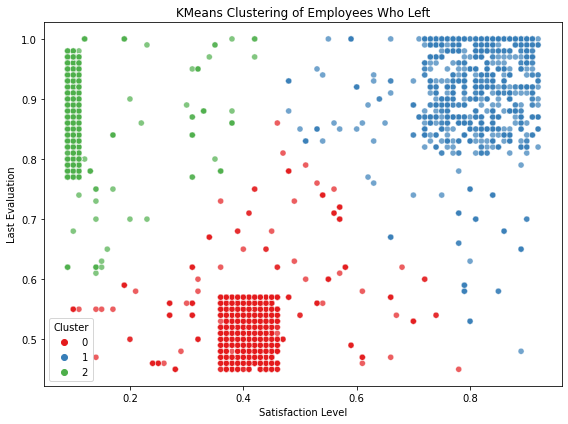

In [12]:
# Step 3: Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=left_df,
                x='satisfaction_level',
                y='last_evaluation',
                hue='cluster',
                palette='Set1',
                alpha=0.7)
plt.title('KMeans Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


# Observation from above clustering

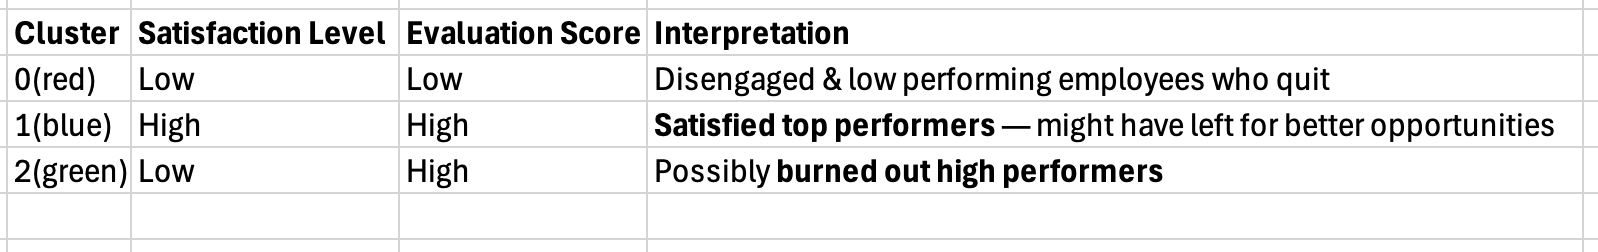


**4.	Handle the left Class Imbalance using SMOTE technique.**

**4.1.	Pre-Process the data by converting categorical columns to numerical columns by**

■	Separating categorical variables and numeric variables.

■	Applying get_dummies() to the categorical variables.

■	Combining categorical variables and numeric variables.


In [13]:
# Convert categorical variables using one-hot encoding
X_cat = data[['department', 'salary']]
X = data.drop(['department', 'salary'], axis=1)
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)

# concatenate date after encoding
X = pd.concat([X, X_cat_encoded], axis=1)

# prepare final data for modeling
X = X.drop(['left'], axis=1)
y = data['left']
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


**As per ChatGPT**

❌ Why You Should Not Apply SMOTE Before Splitting
If you apply SMOTE before the train-test split, it will:

⚠️ 1. Leak Information into the Test Set
SMOTE generates synthetic samples by interpolating between neighbors.

If done on the full dataset, the synthetic data is influenced by all data — including what should be "unseen" test data.

This violates the principle of machine learning evaluation:

"The model should never see the test data (or data derived from it) during training."

⚠️ 2. Creates an Artificially Balanced Test Set
The test set ends up containing synthetic samples or a balanced distribution that doesn't reflect the real-world imbalance you're trying to solve.

This gives you misleadingly optimistic metrics (accuracy, F1, ROC, etc.).

✅ Correct Approach

1️⃣	Split data into X_train, X_test, y_train, y_test

2️⃣	Apply SMOTE only on X_train / y_train

3️⃣	Leave X_test, y_test untouched to reflect reality

4️⃣	Train on balanced X_train, evaluate on imbalanced X_test

This way, your model learns from balanced data, but is tested on real-world class imbalance — giving a true performance measure.


**4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.**

**4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.**


In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the train and test data before applying SMOTE to avoid Leakage.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=123
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 'left' column value count after re-balance
y_train_resampled.value_counts()

0    9142
1    9142
Name: left, dtype: int64

**5.	Perform 5-Fold cross-validation model training and evaluate performance.**

**5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report**

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

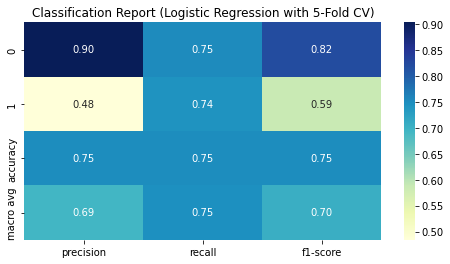

Best Hyperparameters from GridSearchCV:
{'C': 10, 'random_state': 0}


In [16]:
# Build pipeline with Scaling + Logistic Regression
scaler = StandardScaler()
# apply scaling on X-train and X-test
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)

# GridSearchCV with 5-fold CV
param_lr = {
    'C': [0.01, 0.1, 1, 10],           # regularization strength
    'random_state': range(0, 50), 
}

grid_lr = GridSearchCV(lr, param_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train_resampled)

# Predict on test data
y_pred_lr = grid_lr.predict(X_test_scaled)

# Classification report
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_df_lr = pd.DataFrame(report_lr).transpose()

# Plot classification report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df_lr.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report (Logistic Regression with 5-Fold CV)")
plt.show()

# Print best params
print("Best Hyperparameters from GridSearchCV:")
print(grid_lr.best_params_)

**5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.**

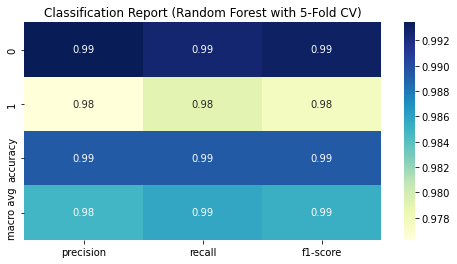

Best Hyperparameters from GridSearchCV:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 30, 'random_state': 40}


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Pipeline
rfc = RandomForestClassifier()

# GridSearchCV with 5-fold CV
params_rf = {
    'n_estimators': [20, 30],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'random_state': range(0, 50)
}

grid_rf = GridSearchCV(rfc, params_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train_resampled)

# Predict on test data
y_pred_rf = grid_rf.predict(X_test_scaled)

# Classification report
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_df_rf = pd.DataFrame(report_rf).transpose()

# Plot classification report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df_rf.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report (Random Forest with 5-Fold CV)")
plt.show()

# Print best params
print("Best Hyperparameters from GridSearchCV:")
print(grid_rf.best_params_)

**5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.**

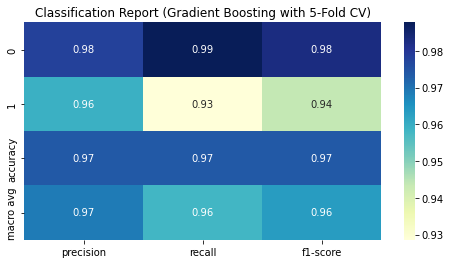

Best Hyperparameters from GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 30, 'random_state': 0}


In [18]:
from xgboost import XGBClassifier

# XGBoost Pipeline
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# GridSearchCV with 5-fold CV
params_xgb = {
    'n_estimators': [20, 30],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'random_state': range(0, 50)
}

grid_xgb = GridSearchCV(xgb, params_xgb, cv=5, scoring='f1', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train_resampled)

# Predict on test data
y_pred_xgb = grid_xgb.predict(X_test_scaled)

# Classification report
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df_xgb = pd.DataFrame(report_xgb).transpose()

# Plot classification report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df_xgb.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report (Gradient Boosting with 5-Fold CV)")
plt.show()

# Print best params
print("Best Hyperparameters from GridSearchCV:")
print(grid_xgb.best_params_)

## 6.	Identify the best model and justify the evaluation metrics used. 
**6.1.	Find the ROC/AUC for each model and plot the ROC curve.**

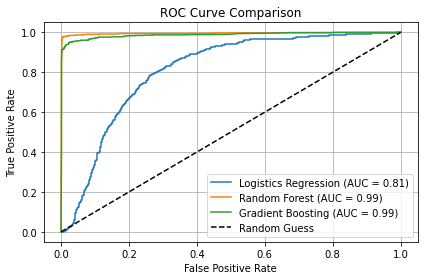

In [19]:
from sklearn.metrics import roc_curve, auc

# ROC for Logistics Regression
y_proba_lr = grid_lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Logistics Regression (AUC = {roc_auc:.2f})")

# ROC for Random Forest
y_proba_rf = grid_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")

# ROC for Gradient Boosting
y_proba_xgb = grid_xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")

# Final plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

**6.2.	Find the confusion matrix for each of the models.**

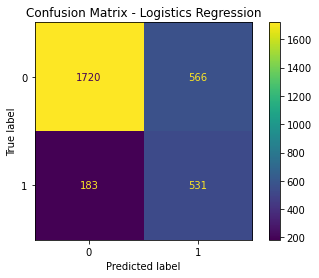

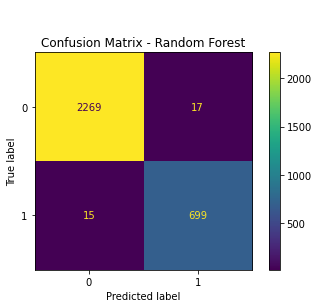

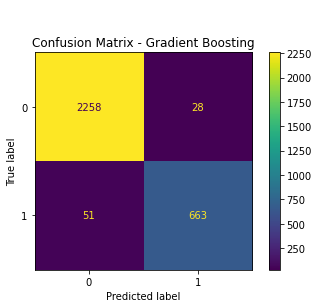

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix Logistics Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Confusion Matrix - Logistics Regression")
plt.show()

# Confusion Matrix Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("\n\nConfusion Matrix - Random Forest")
plt.show()

# Confusion Matrix Gradient Boosting
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.title("\n\nConfusion Matrix - Gradient Boosting")
plt.show()

**6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?**

In [21]:
from sklearn.metrics import confusion_matrix

data = []
model_prediction_map = [
    {"name": "Logistics Regression", "prediction": y_pred_lr},
    {"name": "Random Forest", "prediction": y_pred_rf},
    {"name": "Gradient Boosting", "prediction": y_pred_xgb}
]

for item in model_prediction_map:
    # Calculate precision and recall
    cm = confusion_matrix(y_test, item['prediction'])
    TN, FP, FN, TP = cm.ravel()
    # Calculate metrics
    precision = round(TP / (TP + FP), 2)
    recall = round(TP / (TP + FN), 2)
    data.append({"model": item['name'], "precision": precision, "recall": recall})

confusion_matrix_df = pd.DataFrame(data).set_index(['model'])
confusion_matrix_df

,precision,recall
model,,
Logistics Regression,0.48,0.74
Random Forest,0.98,0.98
Gradient Boosting,0.96,0.93


**Looking at the above table, 'Recall' metric looks to be the right choice to be used here**

# The best model to be used is "Random Forest" with F1 scores shown below
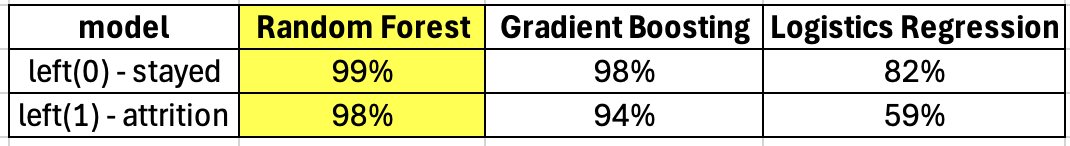

# 7.	Suggest various retention strategies for targeted employees.
**7.1.	Using the best model, predict the probability of employee turnover in the test data.**

**7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.**

■	Safe Zone (Green) (Score < 20%)

■	Low Risk Zone (Yellow) (20% < Score < 60%)

■	Medium Risk Zone (Orange) (60% < Score < 90%)

■	High Risk Zone (Red) (Score > 90%)

In [22]:
# y_proba_rf => It is the value already determined for left=1 (attrition) for Random Forest model
# in 6.1 section during ROC calculation as below.
# y_proba_rf = grid_rf.predict_proba(X_test_scaled)[:, 1]
print(f"total testing employee count: {y_proba_rf.size}")

total testing employee count: 3000


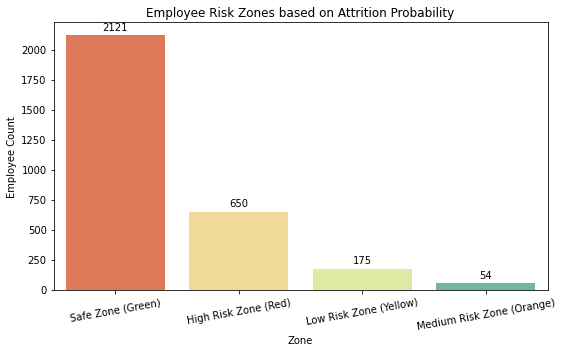

In [23]:
# Categorize based on score
def categorize_zone(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif prob < 0.60:
        return 'Low Risk Zone (Yellow)'
    elif prob < 0.90:
        return 'Medium Risk Zone (Orange)'
    else:
        return 'High Risk Zone (Red)'

zone_categories = np.vectorize(categorize_zone)(y_proba_rf)

# Create summary DataFrame
zone_df = pd.DataFrame({
    'Zone': zone_categories
})

zone_summary = zone_df['Zone'].value_counts().reset_index()
zone_summary.columns = ['Zone', 'Employee Count']

# Visualize the results
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=zone_summary, x='Zone', y='Employee Count', palette='Spectral')

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3, fontsize=10)
    
plt.title("Employee Risk Zones based on Attrition Probability")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# Risk Zones & Retention Strategy Suggestions:
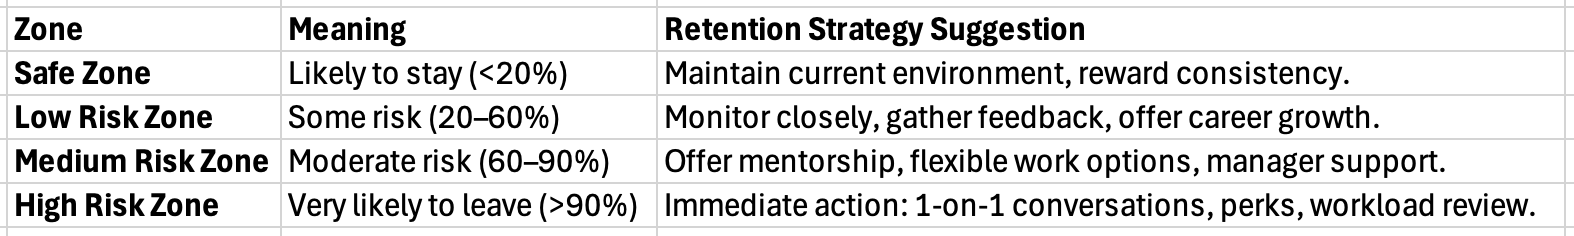